## Jared Connolly
###### Perm No: 4775391

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Q1
# Implement the tridiagonal solver 

def tridiagonal(A, b): # Solves the linear system Ax=b, A is a tridiagonal matrix
    n= len(b)
    A = np.array(A, dtype='double')
    b = np.array(b, dtype='double')
    for i in range(n-1):
        A[i,0] = A[i,0]/A[i,1]
        A[i+1,1] = A[i+1,1]-A[i,0]*A[i,2]
    for i in range(1, n):
        b[i] = b[i]-A[i-1,0]*b[i-1]
    b[n-1] = b[n-1]/A[n-1,1]
    for i in range(n-2,-1,-1):
        b[i] = (b[i]-A[i,2]*b[i+1])/A[i,1]
   
    return b

In [45]:
# Test our code with the following matrix:
A = np.array([[2,1,0,0],
              [1,4,6,0],
              [0,2,4,1],
              [0,0,2,2]])

b = np.array([2,1,2,1])
# Implement our solver
print('Solution:', tridiagonal(At, b))

# Check our solution with linear algebra package
print('Check solution:', np.linalg.solve(A, b))

At = np.zeros((A.shape[0],3))
At[:-1,0] = np.diag(A,-1)
At[:,1] = np.diag(A,0)
At[:-1,2] = np.diag(A,1)


Solution: [-2.   6.  -3.5  4. ]
Check solution: [-2.   6.  -3.5  4. ]


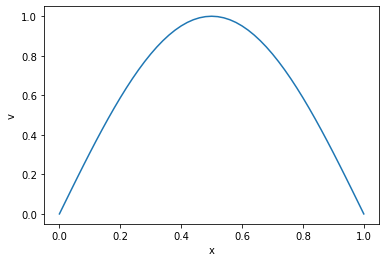

In [51]:
# Q2
# a
N = 50  # Solve for N=50
h = 1/N

x = np.linspace(0,1,N+1)
v = np.zeros_like(x, dtype='double')

# Creating the linear system 
At = np.zeros((N-1, 3))
At[:-1,0] = -1/h**2*np.ones(N-2)
At[:,1] = (2/h**2+np.pi**2)*np.ones(N-1)
At[:-1,2] = -1/h**2*np.ones(N-2)
b = 2*np.pi**2*np.sin(np.pi*x[1:N])

# Solve the linear system
v[1:N] = tridiagonal(At, b)

# Plot as instructed
plt.figure()
plt.plot(x, v)
plt.xlabel('x')
plt.ylabel('v')

plt.show()

##### parts b and d are shown below
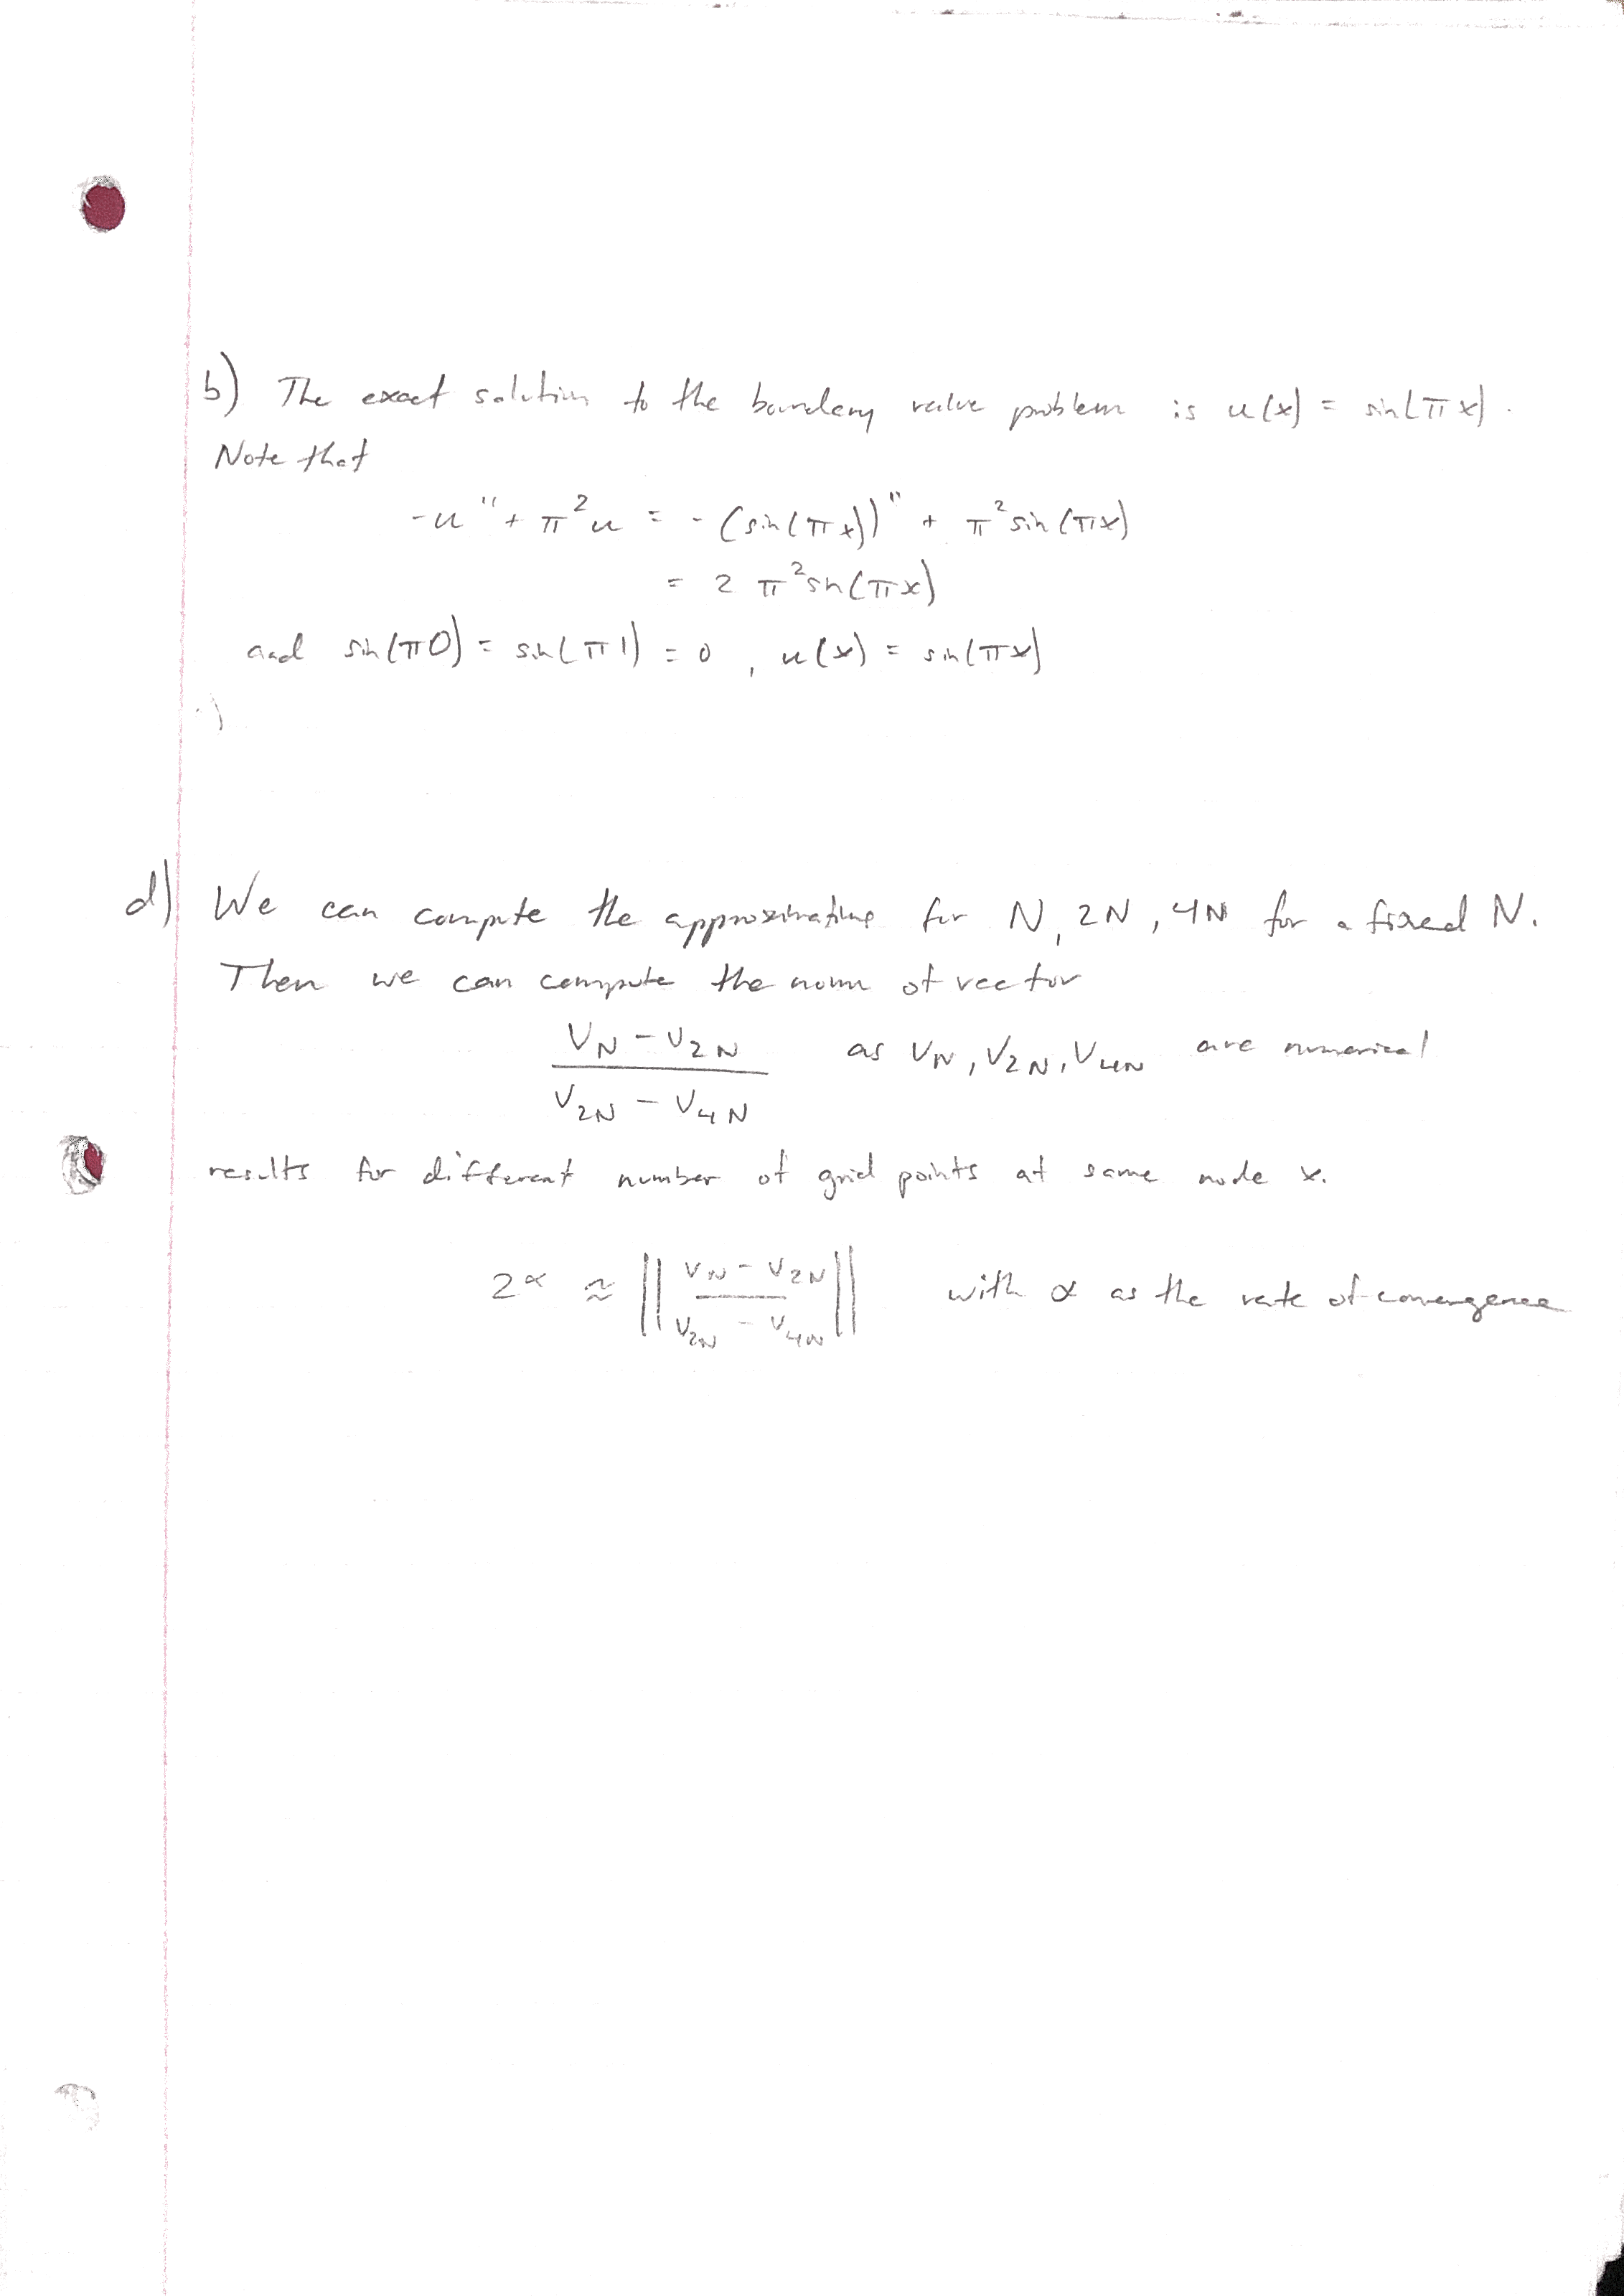

###### c

Note that the expected numerical error is O(h^2)=O(N^-2)
and by multiplying twice by N the error should become 4 times smaller.


In [54]:
# compute the error of your approximation in the 2-norm for N = 50
error = np.linalg.norm(v-np.sin(np.pi*x),2)
print('error for N = %d is'%N1, error)

N1 = 100  # N=100
h1 = 1/N1

x1 = np.linspace(0,1,N1+1)
v1 = np.zeros_like(x1, dtype='double')

# Construct the system
At = np.zeros((N1-1, 3))
At[:-1,0] = -1/h1**2*np.ones(N1-2)
At[:,1] = (2/h1**2+np.pi**2)*np.ones(N1-1)
At[:-1,2] = -1/h1**2*np.ones(N1-2)
b = 2*np.pi**2*np.sin(np.pi*x1[1:N1])

# Solving the system
v1[1:N1] = tridiagonal(At, b)

# compute the error of your approximation in the 2-norm for N = 100
error1 = np.linalg.norm(v1-np.sin(np.pi*x1),2)
print('error for N = %d is'%N1, error1)

print('Alpha =', np.log(error1/error)/np.log(N/N1))

error for N = 100 is 0.0008224940857685608
error for N = 100 is 0.0002907883995157151
Alpha = 1.5000355883713063


We calculated the error in 2-norm--If we calculate the error in max-norm, then we will get alpha equal to 2.

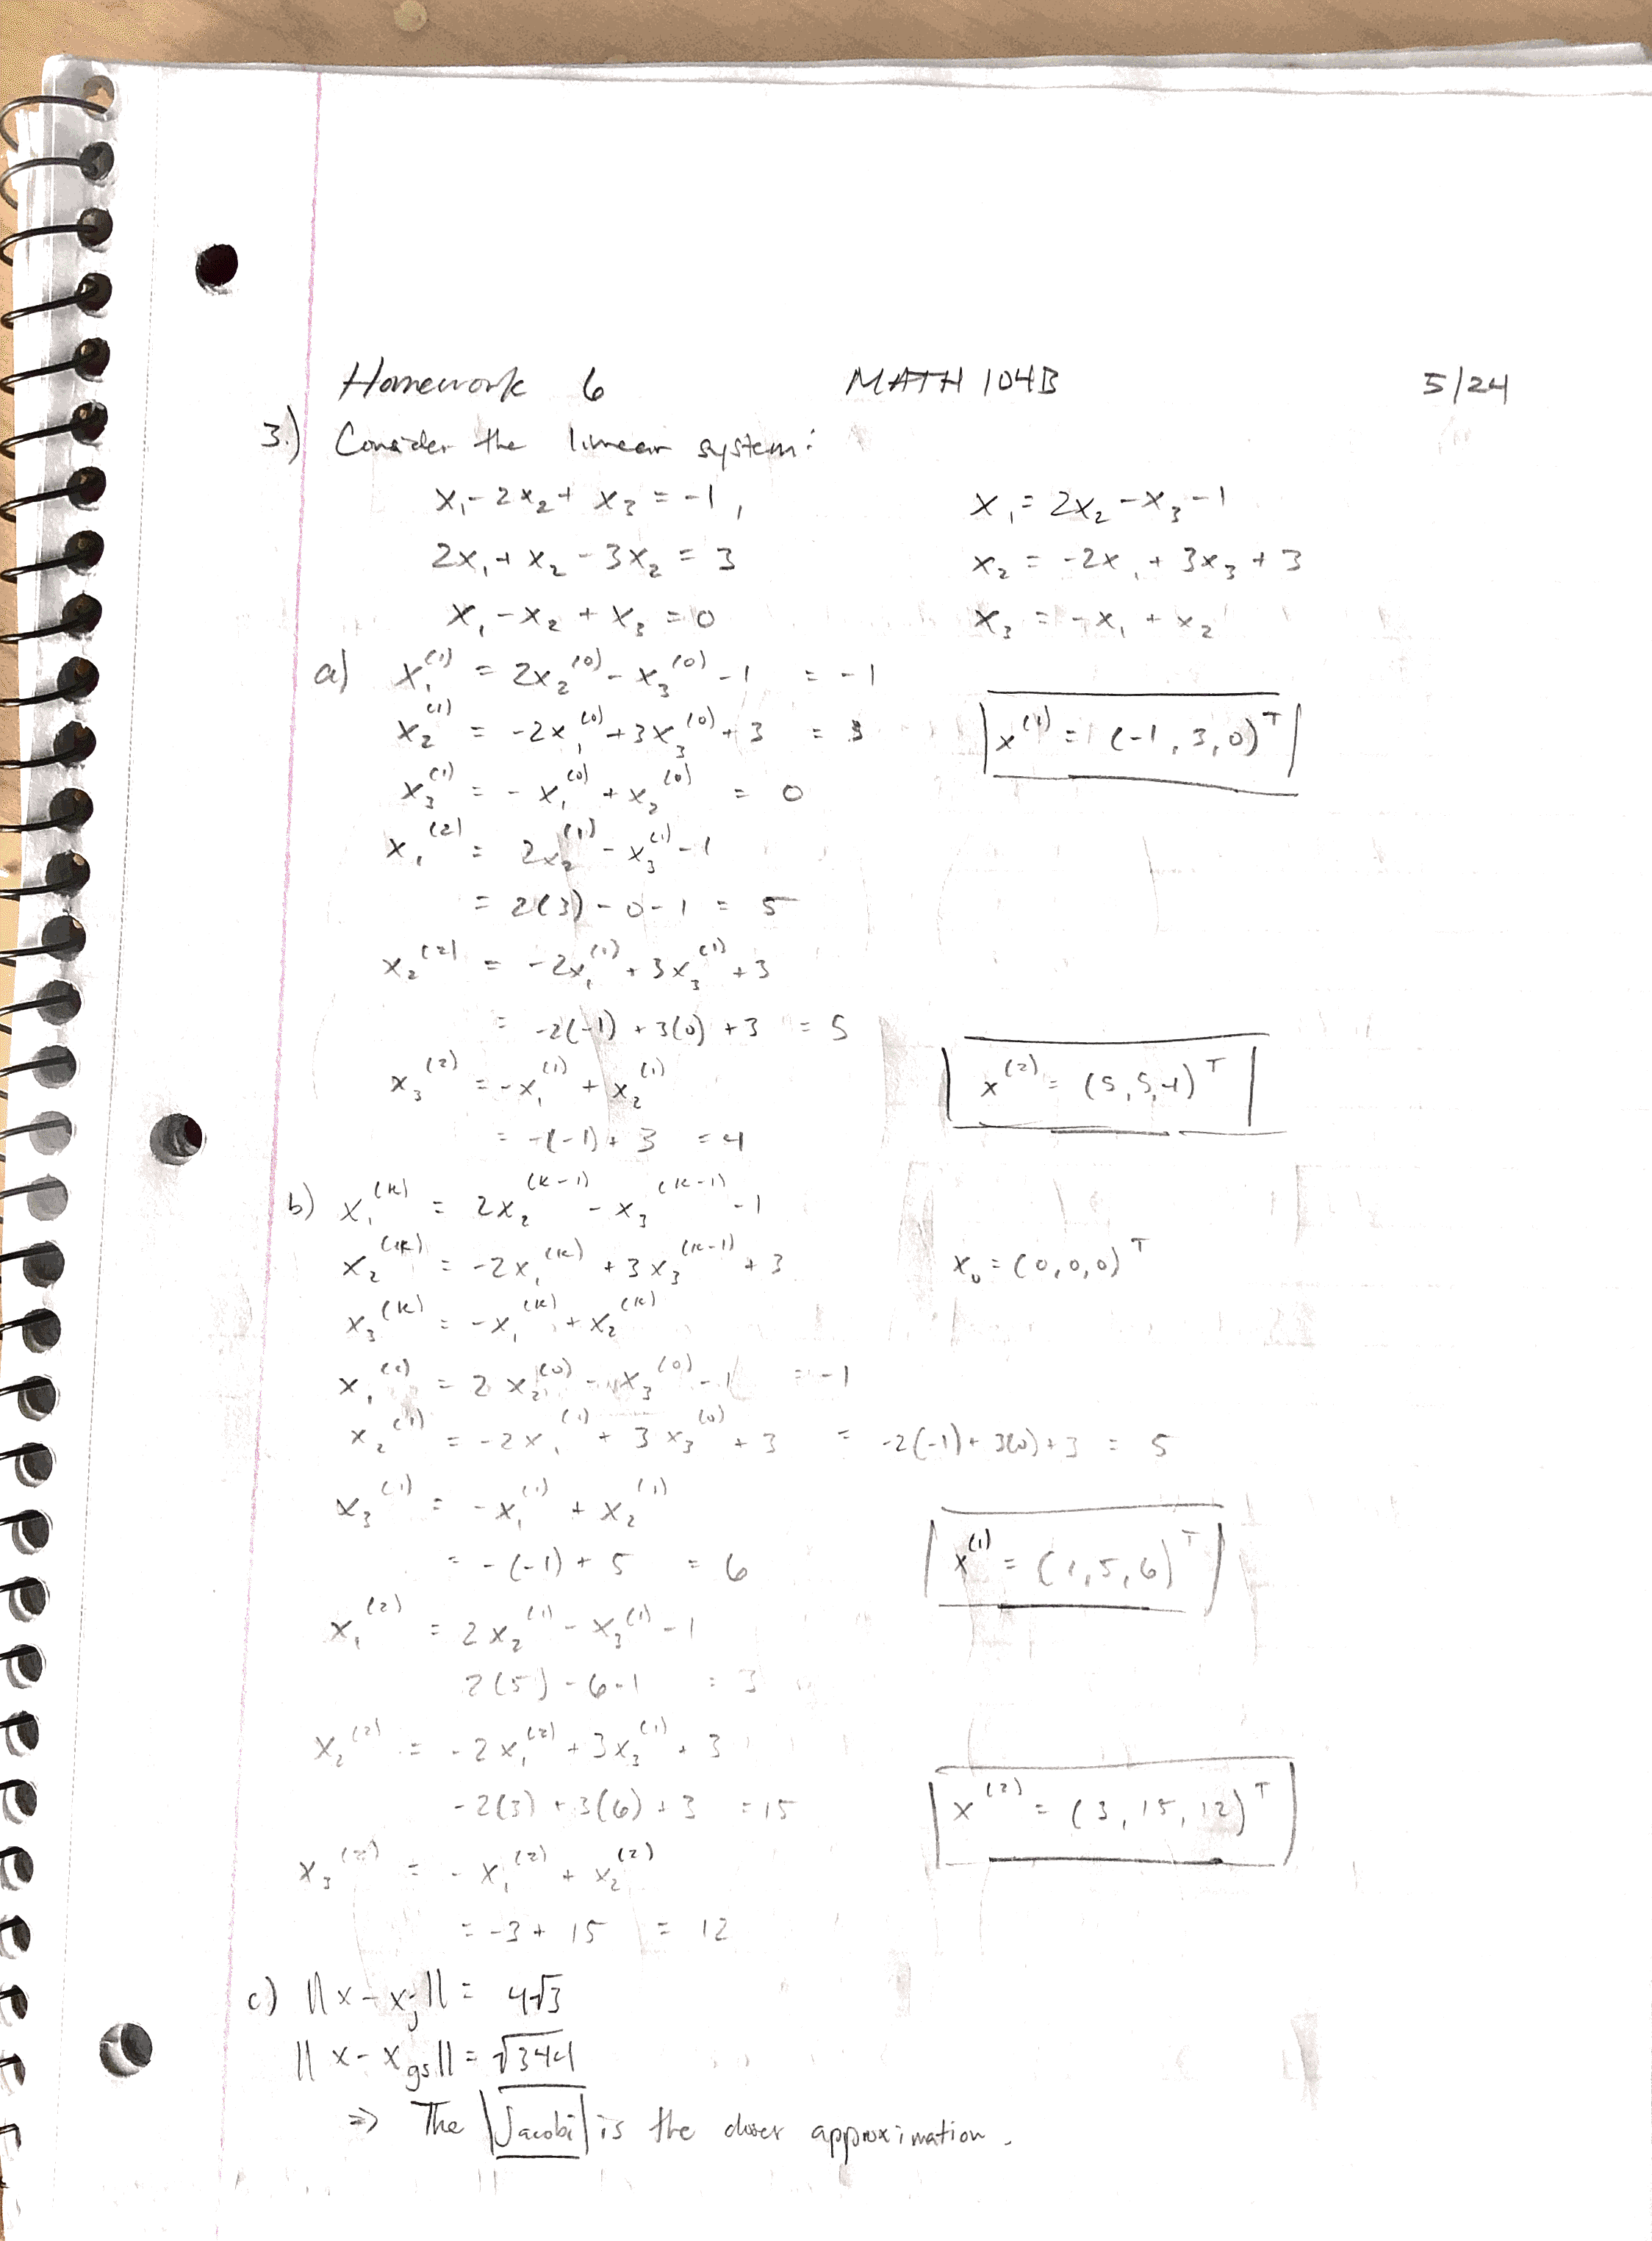

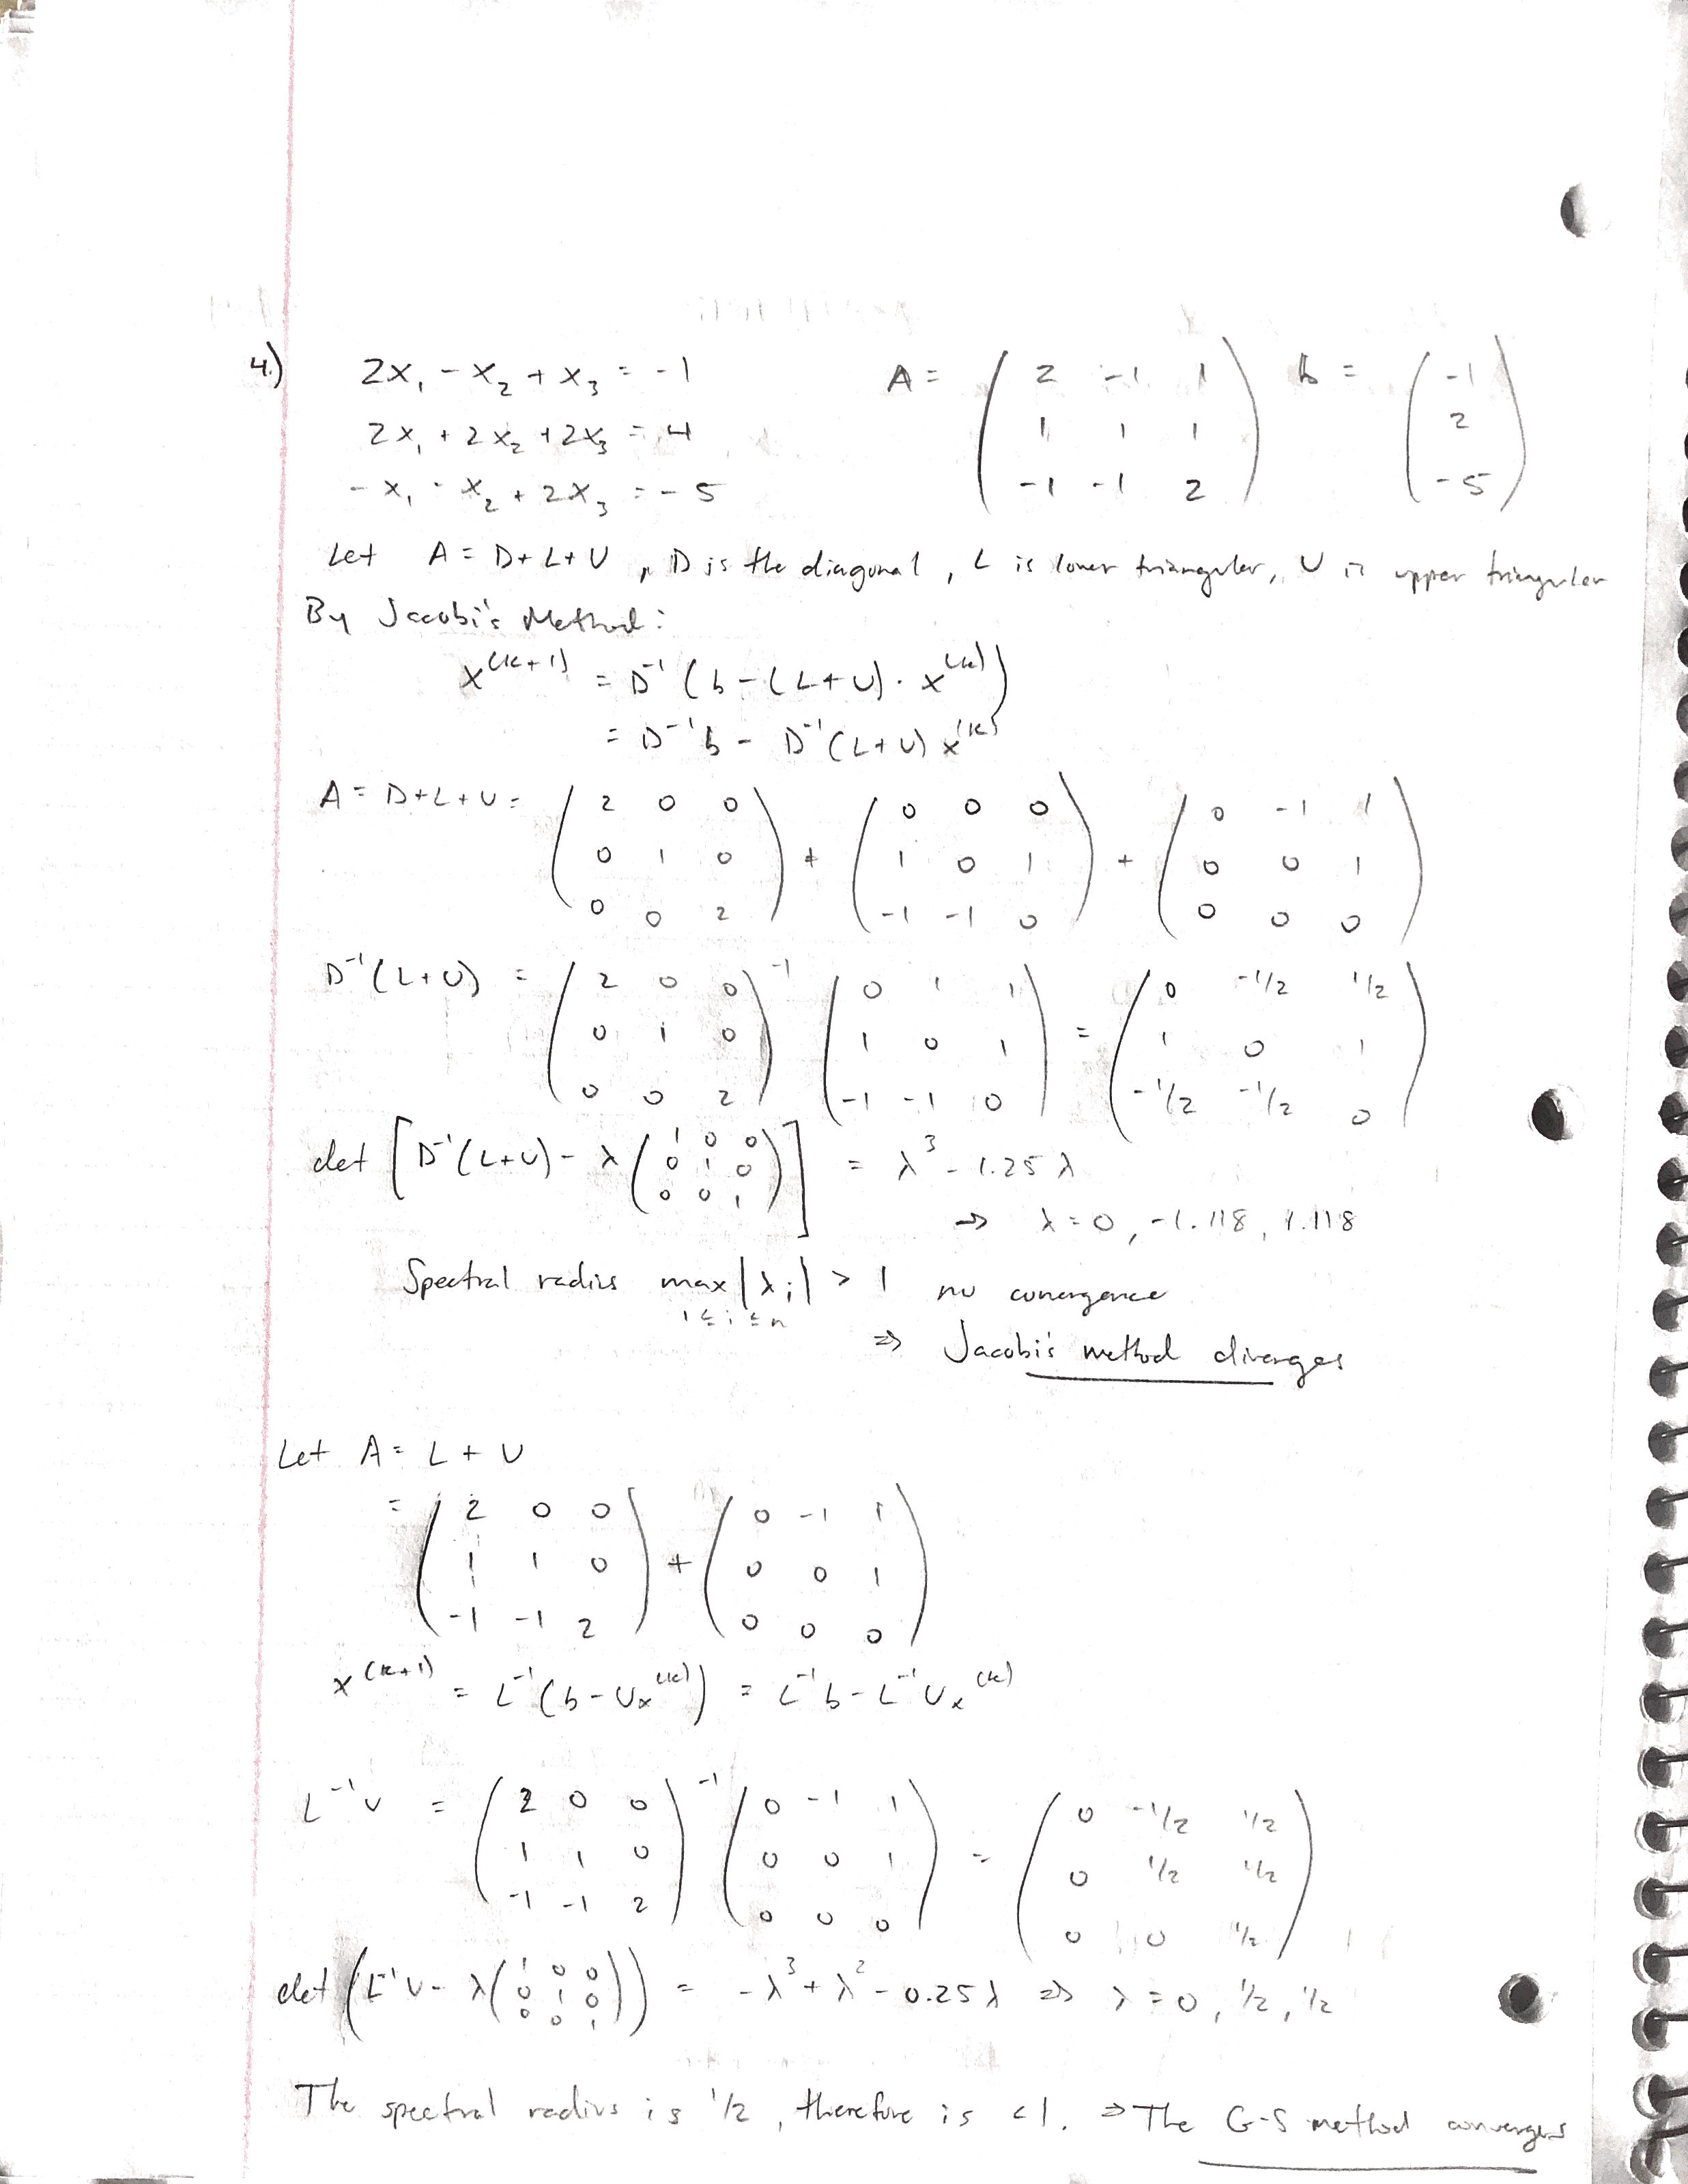